# Preparation

In [ ]:
%run Preparation.ipynb

In [275]:
df152 = pd.read_csv("data/1.52.csv")

relevantColumns = ['id', 'playerId', 'serverTime', 'customData.localplayerguid']

part152 = df152.loc[:,relevantColumns]

df = part152

## Filter out by date

In [278]:
startTime = "2017-05-13T09:30:00.000Z"
endTime = "2017-05-13T17:10:00.000Z"

df = df[(df['serverTime'] > startTime) & (df['serverTime'] < endTime)]

## Unique Game Sessions

Number of unique game sessions

In [279]:
playerscount = df["playerId"].nunique()
playerscount

21

Number of unique devices ids

In [280]:
localPlayerGuids = df.loc[:,['playerId', 'customData.localplayerguid']]
localPlayerGuids.columns= ['id', 'guid']
localPlayerGuids = localPlayerGuids[localPlayerGuids['guid'].notnull()]
localPlayerGuids = localPlayerGuids['guid']
localPlayerGuids.nunique()
localPlayerGuids.unique()

array(['"a4d4b030-9117-4331-ba48-90dc05a7e65a"',
       '"d6826fd9-a6fc-4046-b974-68e50576183f"', 'null',
       '"a8ba2b83-c911-489c-98be-5fde646c46de"',
       '"7cece567-45d0-42e7-9870-3f83fb7de271"',
       '"9880ce9d-c6fc-476e-98a9-a9e8c8f7fcdc"'], dtype=object)

## Duration

Duration of playing sessions

In [281]:
durations = df.groupby("playerId").agg({ "serverTime": [ np.min, np.max  ] })
durations["duration"] = pd.to_datetime(durations["serverTime"]["amax"]) - pd.to_datetime(durations["serverTime"]["amin"])
durations["duration"] = durations["duration"].map(lambda x: np.timedelta64(x, 's'))
durations = durations.sort_values(by=['duration'], ascending=[False])
durations.head()

serverTime  \
                                                          amin   
playerId                                                         
7ef560b8-d2c9-43a6-8d12-3abd0ed39998  2017-05-13T12:33:03.219Z   
487c3935-7ffe-4322-b418-f8a7ddd7e846  2017-05-13T12:24:11.887Z   
fe44a73c-2a17-4efe-9013-aced4670a601  2017-05-13T09:56:07.637Z   
0ea607ab-365d-4961-a5c2-bda66bb9ae0f  2017-05-13T09:55:56.721Z   
5410ba5e-6abe-4367-809b-ae80f5a6d2aa  2017-05-13T14:07:09.810Z   

                                                               duration  
                                                          amax           
playerId                                                                 
7ef560b8-d2c9-43a6-8d12-3abd0ed39998  2017-05-13T14:59:45.081Z 02:26:41  
487c3935-7ffe-4322-b418-f8a7ddd7e846  2017-05-13T13:58:33.580Z 01:34:21  
fe44a73c-2a17-4efe-9013-aced4670a601  2017-05-13T11:13:30.061Z 01:17:22  
0ea607ab-365d-4961-a5c2-bda66bb9ae0f  2017-05-13T10:37:50.900Z 00:41:54  
5410ba5e-6abe-4367-809b-ae80f5a6d2aa  2017-05-13T14:47:01.512Z 00:39:51

Duration plot

serverTime  \
                                                          amin   
playerId                                                         
5410ba5e-6abe-4367-809b-ae80f5a6d2aa  2017-05-13T14:07:09.810Z   
ad1d5579-323d-41ef-9bb6-2e6d84bae6db  2017-05-13T11:18:04.076Z   
3b503d64-c6e8-430a-a158-3eaa59eb3172  2017-05-13T14:03:51.712Z   
88059bd1-fb24-4df8-9c47-248d5670a260  2017-05-13T11:58:52.829Z   
2aea4736-0423-4fe0-93e3-a6b4958a9a8c  2017-05-13T09:31:45.660Z   

                                                               duration  \
                                                          amax            
playerId                                                                  
5410ba5e-6abe-4367-809b-ae80f5a6d2aa  2017-05-13T14:47:01.512Z 00:39:51   
ad1d5579-323d-41ef-9bb6-2e6d84bae6db  2017-05-13T11:56:13.042Z 00:38:08   
3b503d64-c6e8-430a-a158-3eaa59eb3172  2017-05-13T14:38:50.347Z 00:34:58   
88059bd1-fb24-4df8-9c47-248d5670a260  2017-05-13T12:31:47.300Z 00:32:54   
2aea4736-0423-4fe0-93e3-a6b4958a9a8c  2017-05-13T09:55:18.085Z 00:23:32   

                                     duration_seconds duration_rank  
                                                                     
playerId                                                             
5410ba5e-6abe-4367-809b-ae80f5a6d2aa             2391             1  
ad1d5579-323d-41ef-9bb6-2e6d84bae6db             2288             2  
3b503d64-c6e8-430a-a158-3eaa59eb3172             2098             3  
88059bd1-fb24-4df8-9c47-248d5670a260             1974             4  
2aea4736-0423-4fe0-93e3-a6b4958a9a8c             1412             5

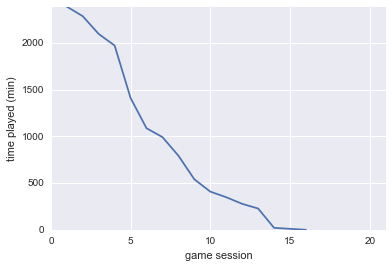

In [282]:
durations.loc[:,'duration']
durations = durations[4:]
durations["duration_seconds"] = durations["duration"].map(lambda x: pd.Timedelta(x).seconds)
maxDuration = np.max(durations["duration_seconds"])
durations["duration_rank"] = durations["duration_seconds"].rank(ascending=False)
durations.plot(x="duration_rank", y="duration_seconds")
plt.xlabel("game session")
plt.ylabel("time played (min)")
plt.legend('')
plt.xlim(0, playerscount)
plt.ylim(0, maxDuration)
durations["duration_seconds"].describe()
durations.head()